In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0) # For reproducibility as same random numbers are generated each time

In [3]:
dog_whiskerLength = np.random.normal(loc=5, scale=1, size =10)
dog_earFlapLength = np.random.normal(loc=8, scale=1, size =10)

In [4]:
cat_whiskerLength = np.random.normal(loc=8, scale=1, size =10)
cat_earFlapLength = np.random.normal(loc=5, scale=1, size =10)

In [5]:
cat_earFlapLength

array([5.15494743, 5.37816252, 4.11221425, 3.01920353, 4.65208785,
       5.15634897, 6.23029068, 6.20237985, 4.61267318, 4.69769725])

In [6]:
dog_earFlapLength

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

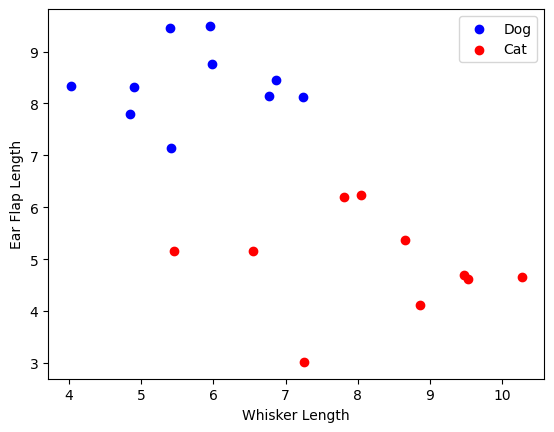

In [7]:
# plot the datapoints
plt.scatter(dog_whiskerLength,dog_earFlapLength, color = 'blue', label='Dog')
plt.scatter(cat_whiskerLength,cat_earFlapLength, color = 'red', label='Cat')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flap Length')
plt.legend()
plt.show()

In [8]:
# implememting random linear classifier algorithm
from sklearn.linear_model import LogisticRegression
def linear_classifier(dogs_data, cat_data, K, d):
    best_error = float('inf')
    best_theta = None
    theta0 = None

    for _ in range(K):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(dogs_data, cat_data, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    
    return best_theta, best_theta0


In [9]:
def compute_error(dog_data, cat_data, theta, theta0):

    error = 0
    for x in dog_data:
        if np.dot(theta, x) + theta0 < 0:
            error += 1
    for x in cat_data:
        if np.dot(theta, x) + theta0 >= 0:
            error += 1
    return error

In [10]:
# prepare data for training
dogs_data = np.vstack((dog_whiskerLength, dog_earFlapLength)).T
cat_data = np.vstack((cat_whiskerLength, cat_earFlapLength)).T

In [11]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [12]:
cat_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [23]:
# Run random classifier
K = 200  # number of random trials
d = 2    # number of features
best_theta, best_theta0 = linear_classifier(dogs_data, cat_data, K, d)

In [24]:
best_theta

array([-1.18468659,  0.9606934 ])

In [25]:
best_theta0

1.3290628465396823

In [26]:
x_vals = np.linspace(2, 10, 100)
y_vals = -(best_theta[0] * best_theta[1]) * x_vals - (best_theta0 / best_theta[1])

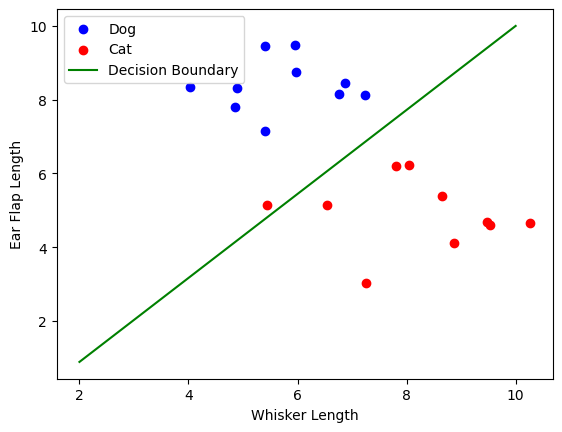

In [27]:
# plot the datapoints
plt.scatter(dog_whiskerLength,dog_earFlapLength, color = 'blue', label='Dog')
plt.scatter(cat_whiskerLength,cat_earFlapLength, color = 'red', label='Cat')
plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flap Length')
plt.legend()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split, KFold

In [19]:
dogs_data = np.vstack((dog_whiskerLength, dog_earFlapLength)).T
cat_data = np.vstack((cat_whiskerLength, cat_earFlapLength)).T
data = np.vstack((dogs_data, cat_data))
labels = np.hstack((np.zeros(dogs_data.shape[0]), np.ones(cat_data.shape[0])))
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [21]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

ValueError: x and y must be the same size

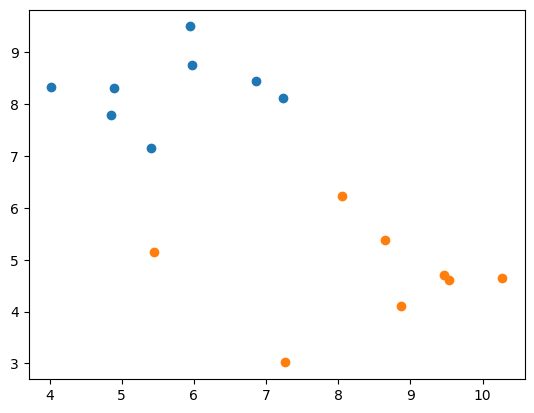

In [22]:
#plot
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], label='Training Dog')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], label='Training Cat')
plt.scatter(X_test[:0],X_test[:1], c=y_test, cmap='bwr', label = 'Testing Data')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flap Length')
plt.legend()
plt.title('Train and Test Data Distribution')
plt.show()